In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [5]:
df['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [6]:
df.EJ = df.EJ.map({'A' : 0, 'B' : 1})

In [7]:
df.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

df.BQ = df.BQ.fillna(0)
df.EL = df.EL.fillna(0)

df_num = df.drop(columns=['Id', 'EJ'])

imputer = SimpleImputer(strategy='median').fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num),columns=df_num.columns, index=df_num.index)
df = pd.concat([df[['Id','EJ']], df_num], axis=1)

In [9]:
df.isna().sum().sum()

0

In [10]:
#  Put everything in a function
def preprocess(df):
    df.EJ = df.EJ.map({'A' : 0, 'B' : 1})
    
    from sklearn.impute import SimpleImputer

    df.BQ = df.BQ.fillna(0)
    df.EL = df.EL.fillna(0)

    df_num = df.drop(columns=['Id', 'EJ'])

    imputer = SimpleImputer(strategy='median').fit(df_num)
    df_num = pd.DataFrame(imputer.transform(df_num),columns=df_num.columns, index=df_num.index)
    df = pd.concat([df[['Id','EJ']], df_num], axis=1)
    
    return df

In [11]:
df['Class'].value_counts()

0.0    509
1.0    108
Name: Class, dtype: int64

In [12]:
# Lets try to balance our data (oversampling)

from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Class','Id'], axis=1)
y = df['Class']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Class'] = y_resampled
balanced_df['Id'] = df['Id']
df = balanced_df

In [13]:
df['Class'].value_counts()

1.0    509
0.0    509
Name: Class, dtype: int64

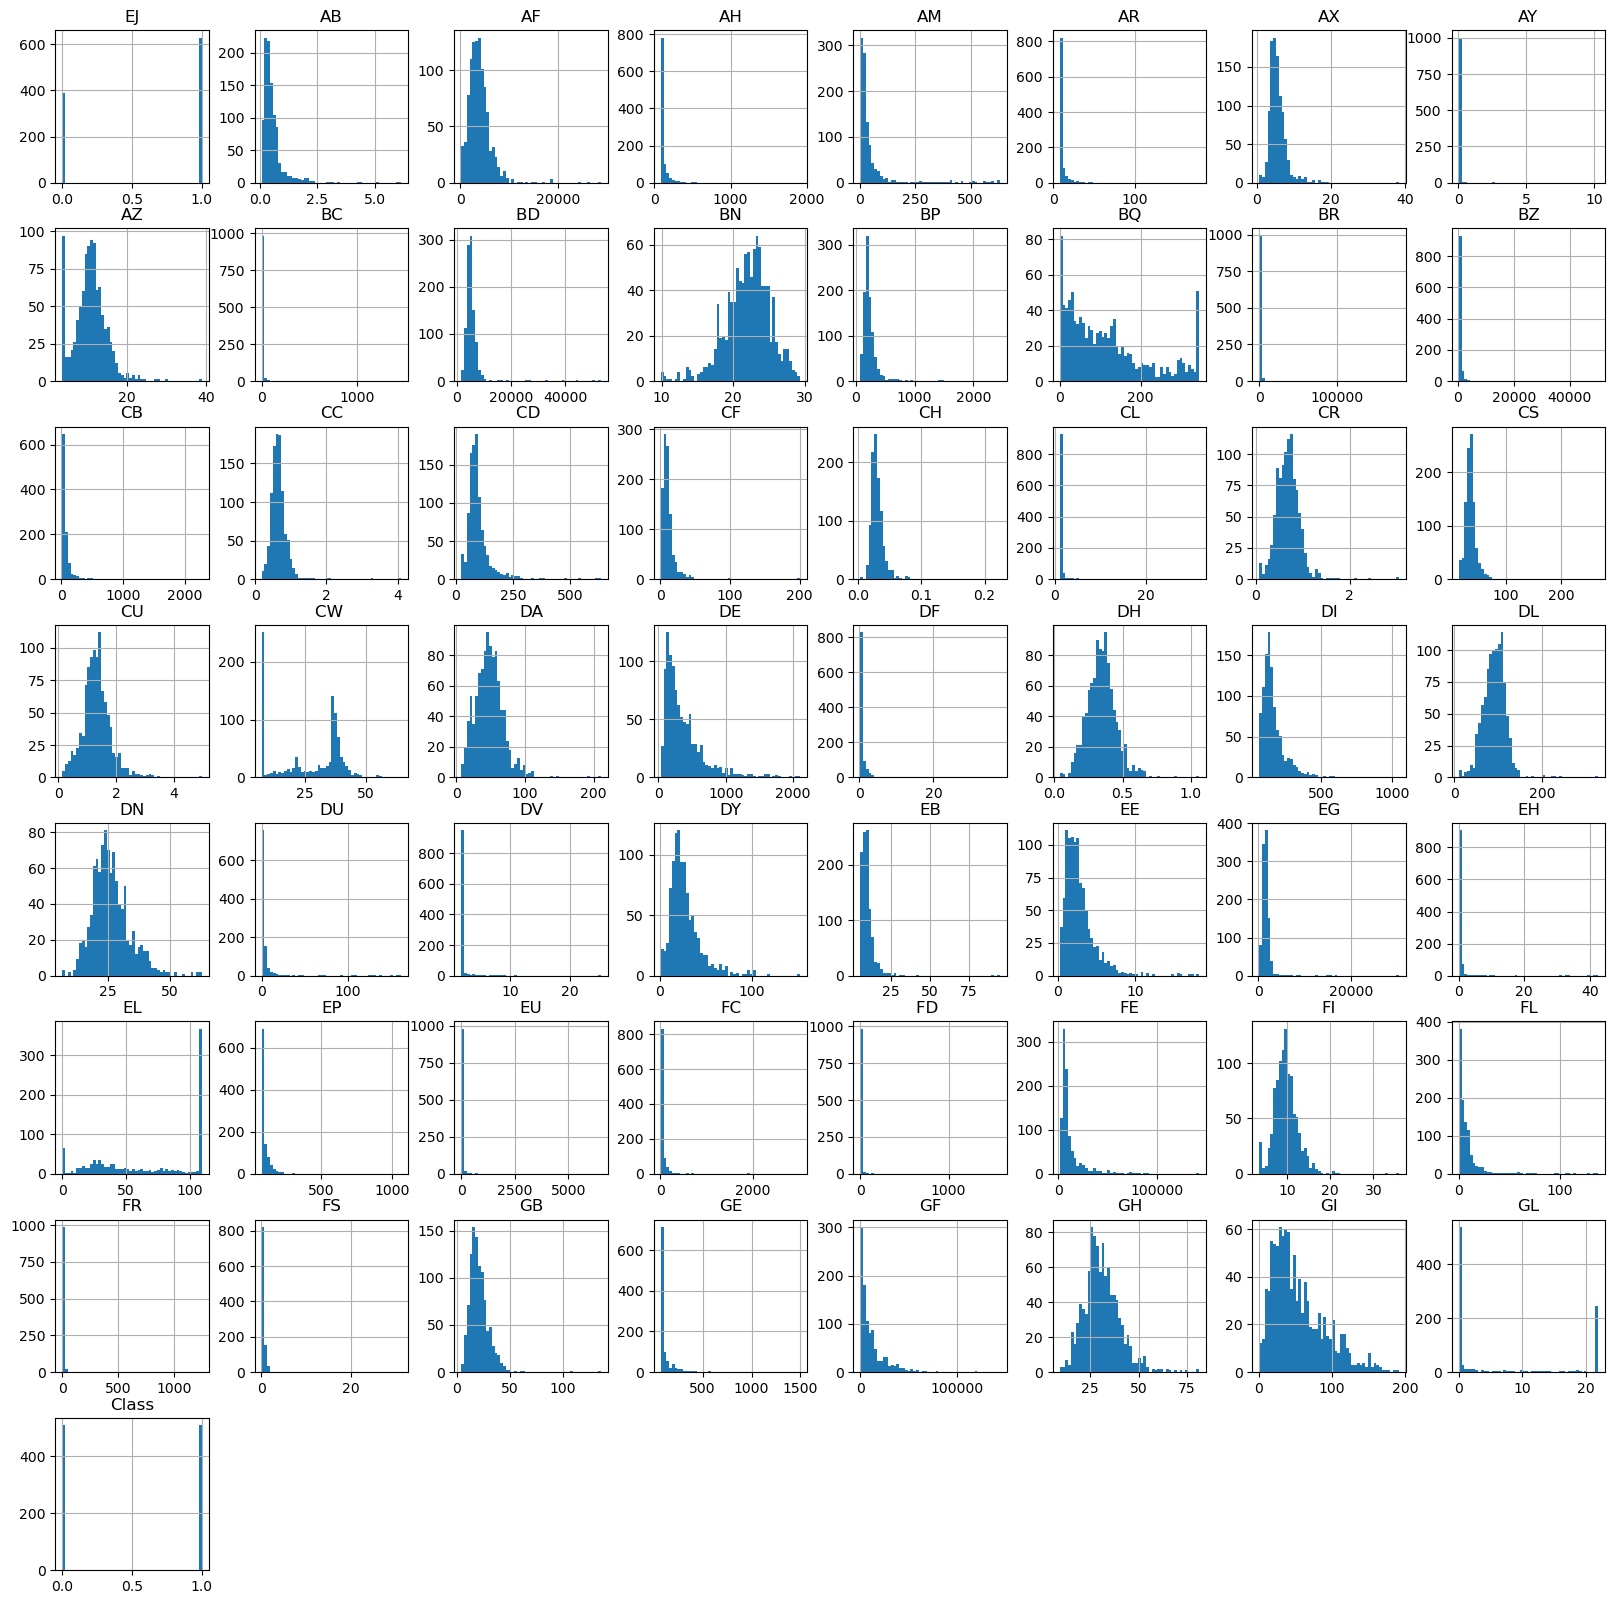

In [14]:
from matplotlib import pyplot

# getting an idea of the distribution of each factor
df.hist(bins=50, figsize = [20,20])
pyplot.show()

In [15]:
from sklearn.metrics import make_scorer, log_loss

# Function that computes balanced log loss
def custom_balanced_log_loss(y_true, y_prob):
    # y_true: True target values
    # y_prob: Predicted probabilities for the positive class (column 1)
    
    # Calculate the balanced log loss
    return log_loss(y_true, y_prob, labels=[0, 1], eps=1e-15, sample_weight=None, normalize=True)

In [16]:
X = df.drop(columns=['Class','Id'], axis=1)
y = df['Class']

In [17]:
# Initialize the KFold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
def train_model(model, X, y, kfold):
    # Create a scorer object using the custom scoring function
    custom_scorer = make_scorer(custom_balanced_log_loss, needs_proba=True)

    # Perform K-Fold cross-validation using the custom scoring function
    results = cross_val_score(model, X, y, cv=kfold, scoring=custom_scorer)

    # Print the results (optional)
    print("Custom Balanced Log Loss: %.2f" % results.mean())
    print("Standard Deviation: %.2f" % results.std())
    
    model.fit(X, y)

In [19]:
# Logistic Regresion

LR_model = LogisticRegression(C = 0.5, solver='liblinear', max_iter=10000)

train_model(LR_model, X, y, kfold)

Custom Balanced Log Loss: 0.30
Standard Deviation: 0.11


In [20]:
# Decision Tree

DT_model = DecisionTreeClassifier()
train_model(DT_model, X, y, kfold)

Custom Balanced Log Loss: 3.33
Standard Deviation: 0.75


In [21]:
# Random Forest

RF_model = RandomForestClassifier(criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split = 4,n_estimators = 200)
train_model(RF_model, X, y, kfold)

Custom Balanced Log Loss: 0.19
Standard Deviation: 0.02


In [22]:
# Gradiant Boosting

GB_model = XGBClassifier()
train_model(GB_model, X, y, kfold)

Custom Balanced Log Loss: 0.11
Standard Deviation: 0.03


In [23]:
dataset_test = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv")
dataset_test = preprocess(dataset_test)
X = dataset_test
Y = X['Id']
X = X.drop("Id", axis=1)
X.fillna(0, inplace=True)
X.head()

predicted_prob = GB_model.predict_proba(X)
predicted_prob

array([[0.9602319 , 0.03976807],
       [0.9602319 , 0.03976807],
       [0.9602319 , 0.03976807],
       [0.9602319 , 0.03976807],
       [0.9602319 , 0.03976807]], dtype=float32)

In [24]:
submission = pd.DataFrame({'Id': Y})
submission[['class_0', 'class_1']] = predicted_prob
submission

,Id,class_0,class_1
0,00eed32682bb,0.960232,0.039768
1,010ebe33f668,0.960232,0.039768
2,02fa521e1838,0.960232,0.039768
3,040e15f562a2,0.960232,0.039768
4,046e85c7cc7f,0.960232,0.039768


In [25]:
submission.to_csv("/kaggle/working/submission.csv", index=False)